In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Affine Transformation

An affine transformation in image processing refers to a linear transformation that preserves points, straight lines, and planes. This transformation includes operations such as translation (shifting), rotation, scaling (resizing), and shearing (skewing). In an affine transformation, parallel lines in the original image remain parallel in the transformed image.

 The transformation matrix consists of rotation, scaling, shearing, and translation components, which determine how the transformation is applied to the image.

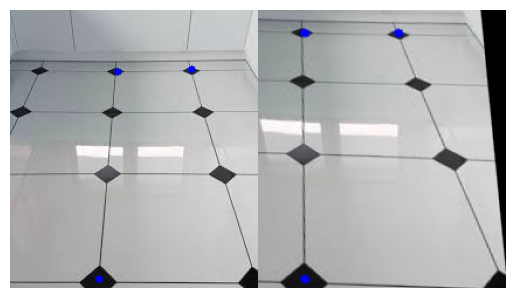

In [2]:
image = cv2.imread('images/perspectiveAffine.jpg')
height, width, _ = image.shape

originalPoints = np.float32([[92,53],[155,51],[76,230]])
targetPoints = np.float32([[40, 20], [120, 20], [40, 230]])

for pt in originalPoints:
    image = cv2.circle(image, (int(pt[0]), int(pt[1])), 3, (0,0,255), -1)
    
affineMatrix = cv2.getAffineTransform(originalPoints, targetPoints)

transformedImage = cv2.warpAffine(image, affineMatrix, (image.shape[1], image.shape[0]))

result = cv2.hconcat([image, transformedImage])

plt.imshow(result)
plt.axis("off")
plt.imsave("AffineTransformation.png",result)

### Perspective Transformation

Perspective transform in image processing refers to the technique of manipulating the perspective of an image by transforming its geometric shape. This transformation is achieved by mapping the points of the original image to new positions in the transformed image, typically using a transformation matrix.

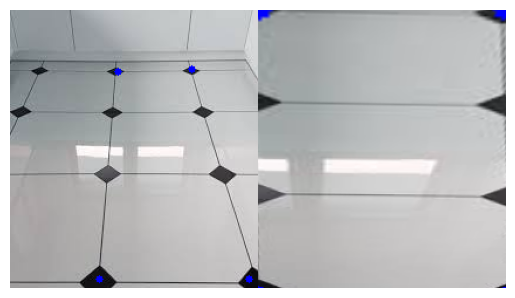

In [3]:
image = cv2.imread('images/perspectiveAffine.jpg')
height, width, _ = image.shape

pts1 = np.float32([[92,53],[155,51],[76,230],[204,230]])
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

for val in pts1:
    floor = cv2.circle(image, (int(val[0]), int(val[1])), 3, (0,0,255), -1)
    
perspectiveMatrix = cv2.getPerspectiveTransform(pts1,pts2)
transformedImage = cv2.warpPerspective(image,perspectiveMatrix,(212,238))

result = cv2.hconcat([image,transformedImage])

plt.imshow(result)
plt.axis("off")
plt.imsave("PerspectiveTransformation.png",result)